In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.DataFrame(data.target)

In [2]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X = df.drop(columns='target')
y = df['target']

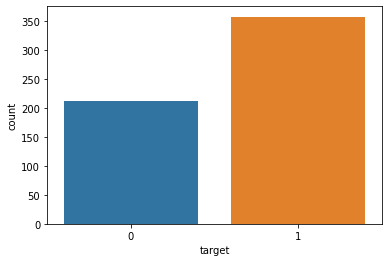

In [4]:
#Checking the class imbalance
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.countplot(x=df['target'],data=df)

In [5]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [6]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
# predicting using decision tree
y_predict = dt_clf.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 60,   3],
       [  8, 100]])

[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

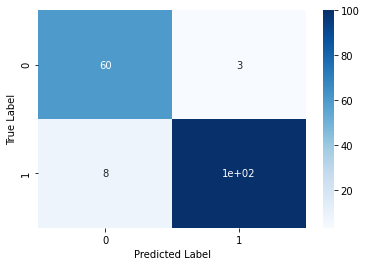

In [9]:
ax = sns.heatmap(cm,annot=True,cmap='Blues')
ax.set(ylabel="True Label", xlabel="Predicted Label")

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.97      0.93      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



### Digit Dataset

In [11]:
from sklearn.datasets import load_digits
data = load_digits()
df_digit = pd.DataFrame(data.data, columns=data.feature_names)
df_digit['class'] = pd.DataFrame(data.target)
df_digit.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


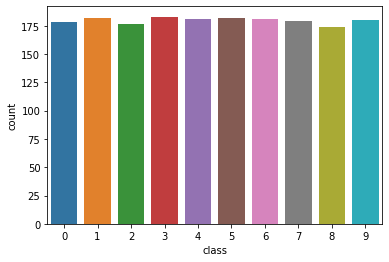

In [13]:
#Checking the class imbalance
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.countplot(x=df_digit['class'],data=df_digit)

In [107]:
df_digit.shape
df_digit.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
class        0
Length: 65, dtype: int64

In [109]:
X = df_digit.drop(columns='class')
y = df_digit['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt_clf_digit = DecisionTreeClassifier()
dt_clf_digit.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
# predicting using decision tree
y_pred = dt_clf_digit.predict(X_test)

In [113]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  0,  1,  0,  2,  1,  0,  0,  0,  1],
       [ 0, 37,  5,  1,  2,  0,  2,  1,  1,  1],
       [ 0,  1, 35,  3,  2,  0,  1,  1,  4,  0],
       [ 0,  0,  1, 46,  1,  0,  1,  1,  1,  3],
       [ 0,  3,  1,  0, 51,  0,  3,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 61,  0,  0,  0,  4],
       [ 0,  0,  1,  0,  0,  2, 49,  1,  0,  0],
       [ 0,  1,  0,  4,  2,  0,  0, 47,  1,  0],
       [ 1,  4,  0,  2,  0,  1,  0,  0, 34,  1],
       [ 0,  0,  1,  1,  1,  1,  0,  2,  1, 52]])

[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

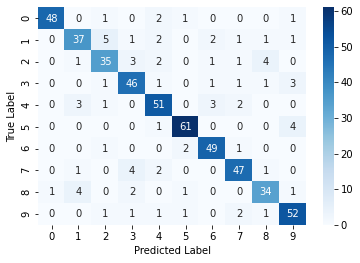

In [114]:
ax = sns.heatmap(cm,annot=True,cmap='Blues')
ax.set(ylabel="True Label", xlabel="Predicted Label")

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.80      0.74      0.77        50
           2       0.78      0.74      0.76        47
           3       0.81      0.85      0.83        54
           4       0.82      0.85      0.84        60
           5       0.92      0.92      0.92        66
           6       0.88      0.92      0.90        53
           7       0.85      0.85      0.85        55
           8       0.81      0.79      0.80        43
           9       0.84      0.88      0.86        59

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540

